In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [2]:
data=pd.read_csv('/content/Walmart DataSet.csv')

In [3]:
pd.reset_option('display.max_rows',None)

In [4]:
data

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
data['Date']=pd.to_datetime(data['Date'],dayfirst=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [8]:
data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.dropna(inplace=True)

In [11]:
m=data.columns
m

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

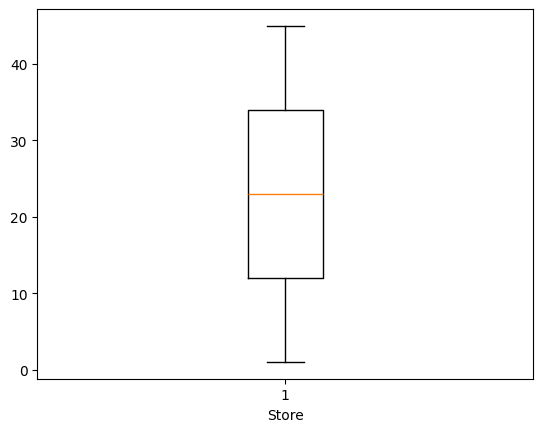

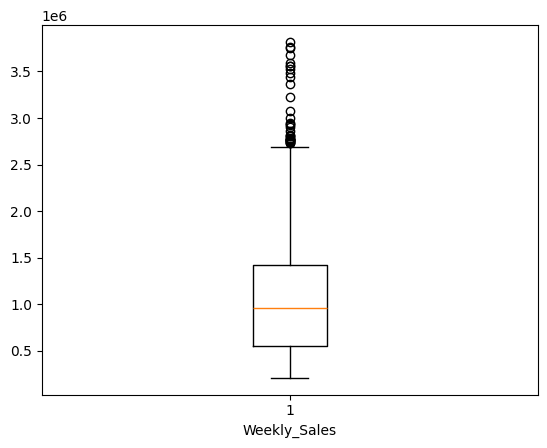

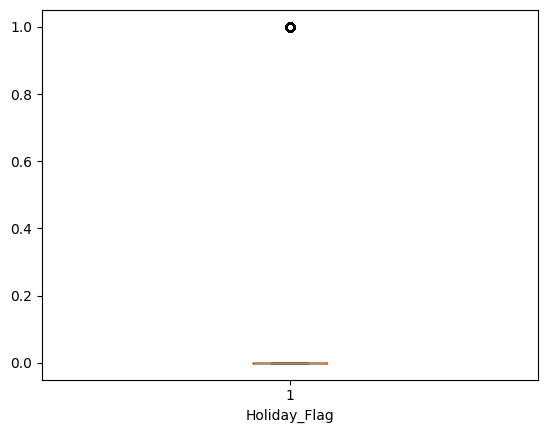

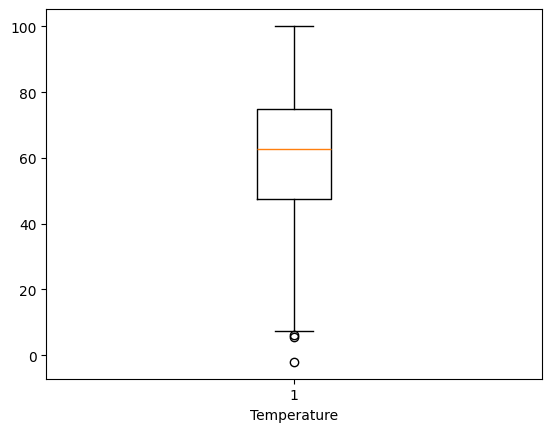

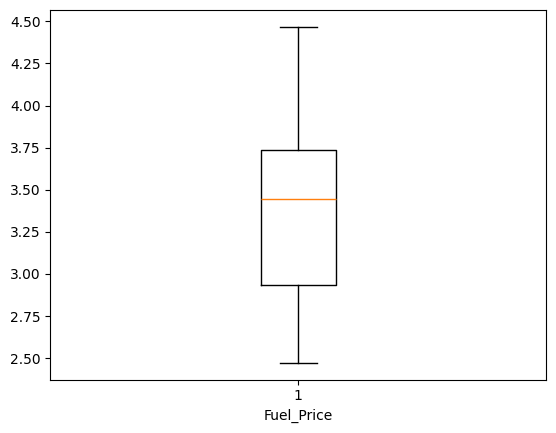

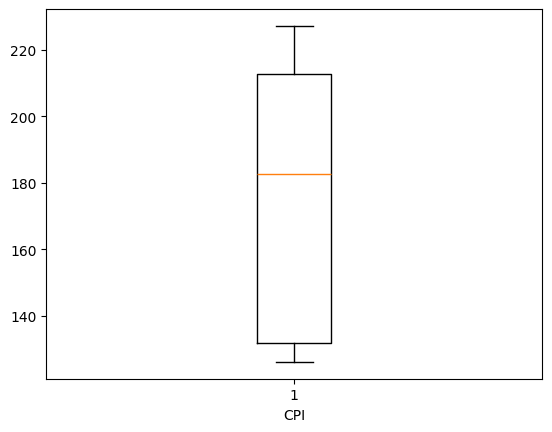

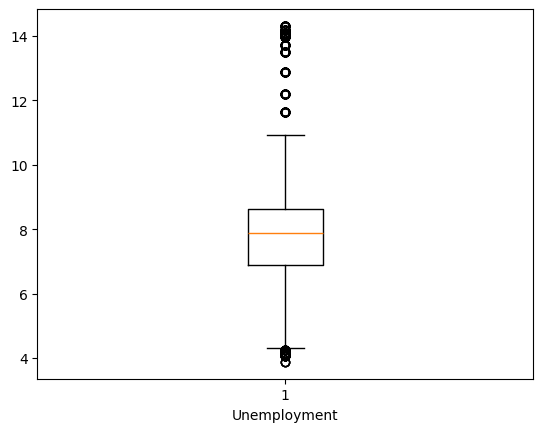

In [12]:
for i in m:
  if data[i].dtype=='object' or data[i].dtype=='datetime64[ns]':
    continue
  plt.boxplot(data[i])
  plt.xlabel(i)
  plt.show()

In [13]:
variable1=['Weekly_Sales','Unemployment']

In [14]:
for i in variable1:
  q1=data[i].quantile(0.25)
  q3=data[i].quantile(0.75)
  iqr=q3-q1
  low_fence=q1-iqr*(1.5)
  high_fence=q3+iqr*(1.5)
  data=data[(data[i]>=low_fence)&(data[i]<=high_fence)]

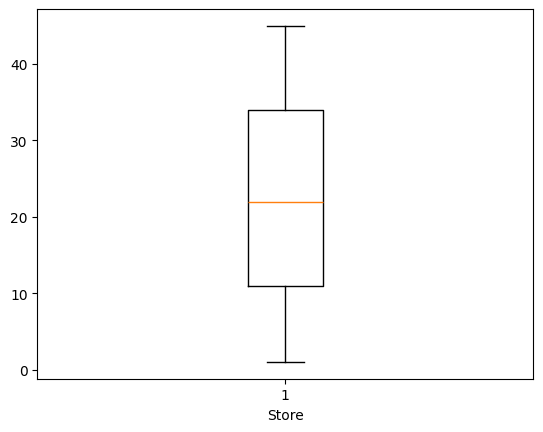

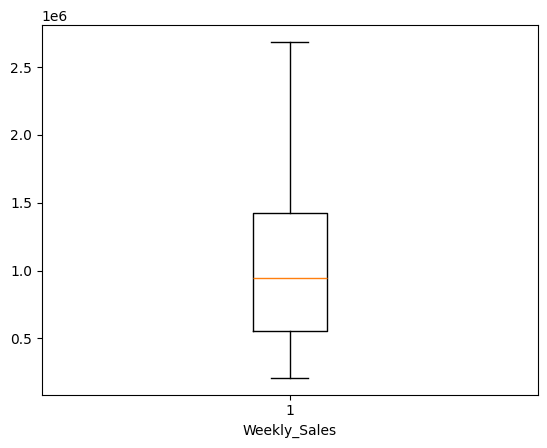

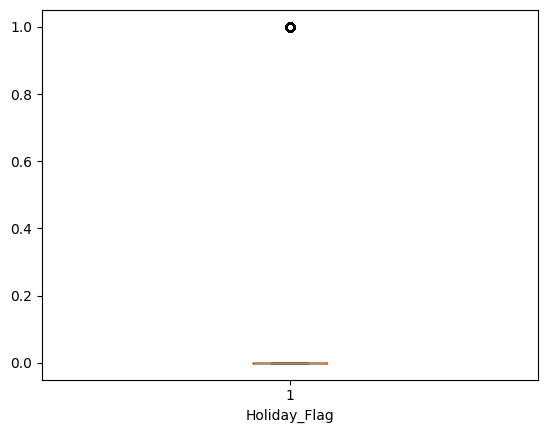

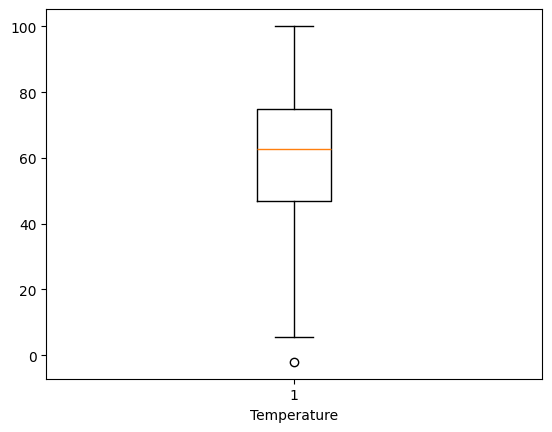

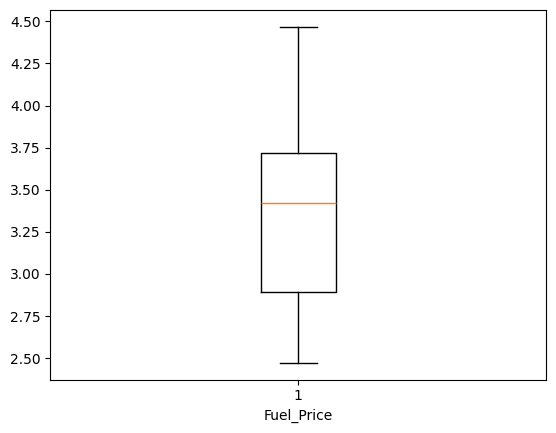

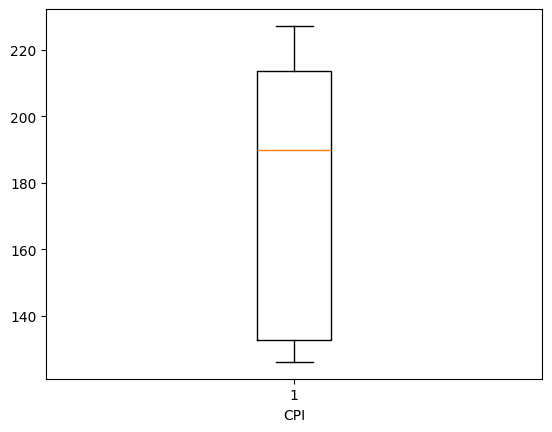

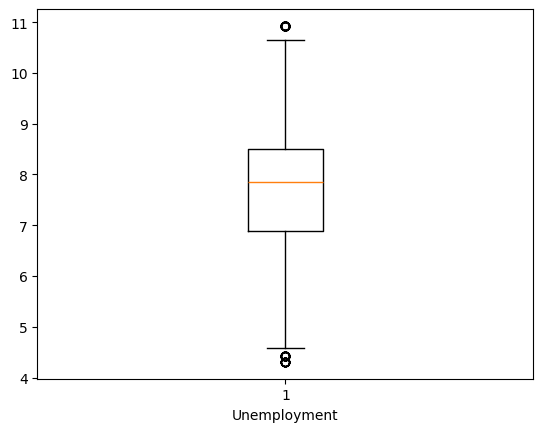

In [15]:
for i in m:
  if data[i].dtype=='object' or data[i].dtype=='datetime64[ns]':
    continue
  plt.boxplot(data[i])
  plt.xlabel(i)
  plt.show()

In [16]:
data

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[5920 rows x 8 columns]

#1 a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [17]:
data['Unemployment'].describe()

count    5920.000000
mean        7.722377
std         1.243156
min         4.308000
25%         6.891000
50%         7.852000
75%         8.494000
max        10.926000
Name: Unemployment, dtype: float64

In [18]:
data['Store'].value_counts()

Store
1     143
21    143
24    143
25    143
26    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
39    143
41    143
42    143
43    143
44    143
22    143
45    143
11    143
16    143
8     143
9     143
5     143
7     143
15    143
3     143
17    143
18    143
19    143
6     142
27    141
2     141
14    139
10    138
13    137
20    136
4     120
40    100
23     99
38     17
12     17
28     17
Name: count, dtype: int64

In [19]:
data['Unemployment'].value_counts()

Unemployment
8.099    78
7.852    56
8.163    55
6.565    52
8.200    52
         ..
7.543     4
6.895     4
5.847     4
5.527     4
5.217     4
Name: count, Length: 333, dtype: int64

In [20]:
set1=data.groupby('Store')[['Unemployment','Weekly_Sales']].mean().sort_values('Weekly_Sales',ascending=True)
#data.groupby('Store')[['Unemployment','Weekly_Sales']].mean().sort_values('Unemployment',ascending=False)

In [21]:
set1

Unemployment  Weekly_Sales
Store                            
33         8.533154  2.598617e+05
44         6.735622  3.027489e+05
5          6.295406  3.180118e+05
36         7.869049  3.735120e+05
3          7.176986  4.027044e+05
38        10.754941  4.321988e+05
30         7.623846  4.385796e+05
37         7.869049  5.189003e+05
16         6.477993  5.192477e+05
29         9.806385  5.394514e+05
9          6.099881  5.439806e+05
42         8.362965  5.564039e+05
7          8.585734  5.706173e+05
15         7.996252  6.233125e+05
43         9.934804  6.333247e+05
25         7.371413  7.067215e+05
21         7.623846  7.560691e+05
45         8.648748  7.859814e+05
17         6.549406  8.935814e+05
8          6.091846  9.087495e+05
35         8.788573  9.197250e+05
12        10.754941  9.639242e+05
34         9.934804  9.667816e+05
40         5.062040  9.669790e+05
26         7.872070  1.002912e+06
22         8.069371  1.028501e+06
18         8.838301  1.084718e+06
32         8.585734  1.166568e+06
28        10.754941  1.241575e+06
41         6.973378  1.268125e+06
11         7.176986  1.356383e+06
24         8.447014  1.356755e+06
23         5.059768  1.386347e+06
31         7.623846  1.395901e+06
19         7.996252  1.444999e+06
39         7.869049  1.450668e+06
1          7.610420  1.555264e+06
6          6.604085  1.556539e+06
27         8.002291  1.759140e+06
10         8.356138  1.852745e+06
2          7.621319  1.905830e+06
13         6.997810  1.957682e+06
14         8.648029  1.986529e+06
4          6.230200  2.038739e+06
20         7.374485  2.058998e+06

In [22]:
'''Based on my analysis, Store 33 has low weekly sales, but this is not due to unemployment,
as its unemployment rate is moderaltey high. In contrast, Store 38 shows low weekly sales that
appear to be influenced by a very high unemployment rate.'''

'Based on my analysis, Store 33 has low weekly sales, but this is not due to unemployment,\nas its unemployment rate is moderaltey high. In contrast, Store 38 shows low weekly sales that\nappear to be influenced by a very high unemployment rate.'

# b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [23]:
data

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[5920 rows x 8 columns]

In [24]:
data['Date'].value_counts()

Date
2010-02-05    42
2011-09-23    42
2011-09-09    42
2011-09-02    42
2011-08-26    42
              ..
2011-11-25    38
2010-11-26    37
2010-12-17    37
2011-12-23    35
2010-12-24    33
Name: count, Length: 143, dtype: int64

In [25]:
data

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[5920 rows x 8 columns]

In [26]:
data['Month']=data['Date'].dt.month #dt.month used to extract month from date

In [27]:
data

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  Month  
0     211.096358         8.106      2  
1     211.242170         8.106      2  
2     211.289143         8.106      2  
3     211.319643         8.106      2  
4     211.350143         8.106      3  
...          ...           ...    ...  
6430  192.013558         8.684      9  
6431  192.170412         8.667     10  
6432  192.327265         8.667     10  
6433  192.330854         8.667     10  
6434  192.308899         8.667     10  

[5920 rows x 9 columns]

In [28]:
set2 = data.groupby('Month')['Weekly_Sales'].mean()

Text(0, 0.5, 'weekly_sales avg')

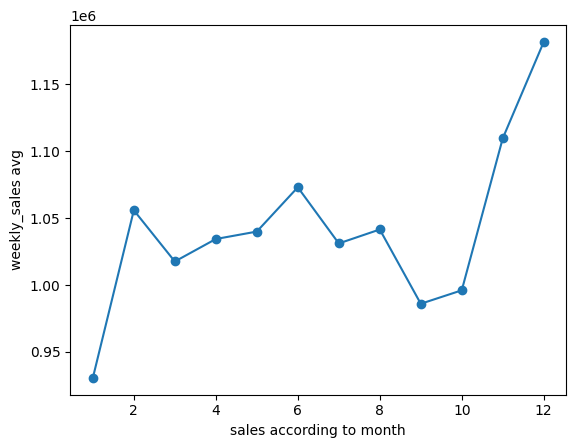

In [29]:
set2.plot(marker='o')
plt.xlabel('sales according to month')
plt.ylabel('weekly_sales avg')

In [30]:
data.groupby('Month')[['Weekly_Sales','Holiday_Flag','Temperature']].mean()

Weekly_Sales  Holiday_Flag  Temperature
Month                                         
1      9.304968e+05      0.000000    37.247866
2      1.055885e+06      0.250000    38.224940
3      1.017574e+06      0.000000    49.516269
4      1.034394e+06      0.000000    57.226448
5      1.039951e+06      0.000000    65.011371
6      1.073075e+06      0.000000    74.742052
7      1.031086e+06      0.000000    79.224184
8      1.041519e+06      0.000000    78.914560
9      9.859676e+05      0.230769    72.048810
10     9.960250e+05      0.000000    61.247381
11     1.109696e+06      0.229358    49.579297
12     1.181804e+06      0.212658    39.783671

In [31]:
'''My analysis shows that weekly sales are highest in December. This is likely because there are more holidays in this month,
and the weather is also comfortable, which might encourage people to shop more and this could be the reason for seasonal trend'''

'My analysis shows that weekly sales are highest in December. This is likely because there are more holidays in this month,\nand the weather is also comfortable, which might encourage people to shop more and this could be the reason for seasonal trend'

# c. Does temperature affect the weekly sales in any manner?

In [32]:
data

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  Month  
0     211.096358         8.106      2  
1     211.242170         8.106      2  
2     211.289143         8.106      2  
3     211.319643         8.106      2  
4     211.350143         8.106      3  
...          ...           ...    ...  
6430  192.013558         8.684      9  
6431  192.170412         8.667     10  
6432  192.327265         8.667     10  
6433  192.330854         8.667     10  
6434  192.308899         8.667     10  

[5920 rows x 9 columns]

In [33]:
set3=data.groupby('Temperature')[['Weekly_Sales']].mean().reset_index().sort_values('Weekly_Sales',ascending=False)

In [34]:
set3

Temperature  Weekly_Sales
208         26.05    2678206.42
1840        62.98    2658725.29
1118        49.45    2644633.02
257         27.80    2587953.32
747         41.64    2546123.78
...           ...           ...
3383        95.28     224806.96
1774        61.95     224639.76
3349        91.45     224294.39
3378        94.00     224031.19
1288        52.91     219804.85

[3407 rows x 2 columns]

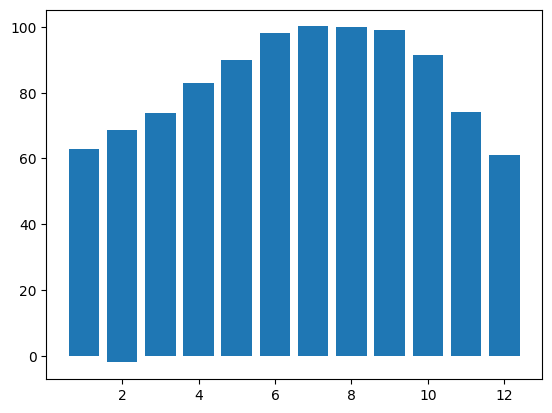

In [35]:
plt.bar(data['Month'],data['Temperature'])
plt.show() #i have plotted bar plot here to check temperature accoording to month

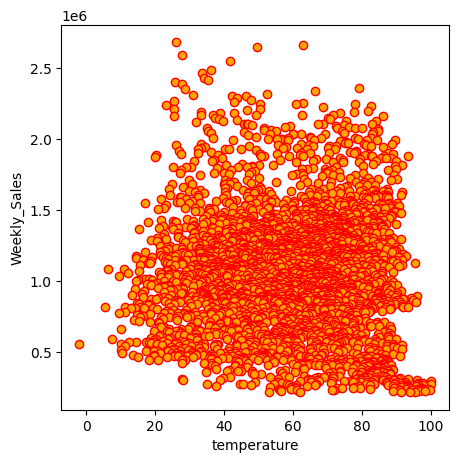

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(set3['Temperature'],set3['Weekly_Sales'],edgecolor='red',color='orange')
plt.xlabel('temperature')
plt.ylabel('Weekly_Sales')
plt.show()

In [37]:
''' From my analysis i found that temperature has a effect on weekly sales ,
we can see it clearly in scatter plot where weekly sales are at it best at temperature 26.3
and temperature around 50-60 weekly sales are low'''

' From my analysis i found that temperature has a effect on weekly sales ,\nwe can see it clearly in scatter plot where weekly sales are at it best at temperature 26.3\nand temperature around 50-60 weekly sales are low'

# d. How is the Consumer Price index affecting the weekly sales of various stores?

In [38]:
data

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  Month  
0     211.096358         8.106      2  
1     211.242170         8.106      2  
2     211.289143         8.106      2  
3     211.319643         8.106      2  
4     211.350143         8.106      3  
...          ...           ...    ...  
6430  192.013558         8.684      9  
6431  192.170412         8.667     10  
6432  192.327265         8.667     10  
6433  192.330854         8.667     10  
6434  192.308899         8.667     10  

[5920 rows x 9 columns]

In [39]:
set4=data.groupby('CPI')[['Weekly_Sales']].mean().reset_index().sort_values('Weekly_Sales',ascending=False)


In [40]:
set4

CPI  Weekly_Sales
1826  220.947724    2644633.02
1040  211.405122    2387950.20
1739  219.357722    2270188.99
1212  213.267296    2267452.40
1772  220.041741    2249811.55
...          ...           ...
1082  211.791557     274742.63
1061  211.571892     273282.97
1092  211.877147     270281.63
1099  211.927001     268929.03
1110  212.008514     260636.71

[2144 rows x 2 columns]

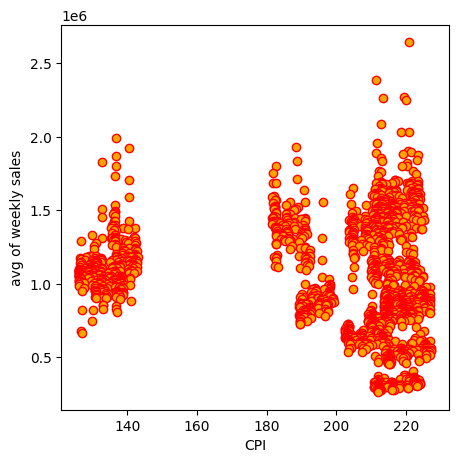

In [41]:
plt.figure(figsize=(5,5))
plt.scatter(set4['CPI'],set4['Weekly_Sales'],color='orange',edgecolors='red')
plt.xlabel('CPI')
plt.ylabel('avg of weekly sales')
plt.show()

In [42]:
set4.corr()

CPI  Weekly_Sales
CPI           1.000000     -0.173034
Weekly_Sales -0.173034      1.000000

In [43]:
''' from my analysis i found that CPI has no significant and consistent effect on weekly sales because
some cpi values are high but sales are high and at some CPI values are low but sales high and
the correalation co-efficeint values -0.173 it is quite negiligble'''

' from my analysis i found that CPI has no significant and consistent effect on weekly sales because\nsome cpi values are high but sales are high and at some CPI values are low but sales high and\nthe correalation co-efficeint values -0.173 it is quite negiligble'

# e. Top performing stores according to the historical data.


In [44]:
data

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  Month  
0     211.096358         8.106      2  
1     211.242170         8.106      2  
2     211.289143         8.106      2  
3     211.319643         8.106      2  
4     211.350143         8.106      3  
...          ...           ...    ...  
6430  192.013558         8.684      9  
6431  192.170412         8.667     10  
6432  192.327265         8.667     10  
6433  192.330854         8.667     10  
6434  192.308899         8.667     10  

[5920 rows x 9 columns]

In [45]:
set5=data.groupby(['Store','Holiday_Flag'])[['Weekly_Sales','Unemployment']].mean().reset_index().sort_values('Weekly_Sales',ascending=False)

In [46]:
set5

Store  Holiday_Flag  Weekly_Sales  Unemployment
39     20             1  2.096560e+06      7.392250
3       2             1  2.079267e+06      7.713300
7       4             1  2.073107e+06      6.432286
38     20             0  2.056650e+06      7.373375
6       4             0  2.036610e+06      6.217681
..    ...           ...           ...           ...
8       5             0  3.148923e+05      6.288241
86     44             0  3.032536e+05      6.728797
87     44             1  2.960356e+05      6.826400
65     33             1  2.625945e+05      8.630300
64     33             0  2.596562e+05      8.525850

[90 rows x 4 columns]

In [47]:
data['Holiday_Flag'].value_counts()

Holiday_Flag
0    5511
1     409
Name: count, dtype: int64

Text(0, 0.5, 'Avg weekly sales')

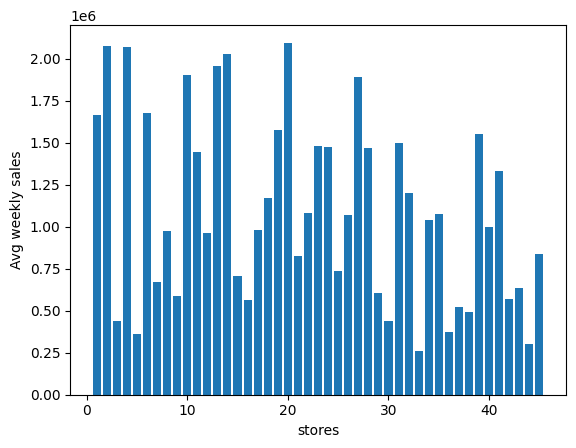

In [48]:
plt.bar(set5['Store'],set5['Weekly_Sales'])
plt.xlabel('stores')
plt.ylabel('Avg weekly sales')

In [49]:
''' from my analysis top performing stores are 20 and 2 because it has high average of Weekly_Sales and
it is holiday it shows that they have done good promotions on holiday in contrast they  have high unemployent rate but not high among all '''

' from my analysis top performing stores are 20 and 2 because it has high average of Weekly_Sales and\nit is holiday it shows that they have done good promotions on holiday in contrast they  have high unemployent rate but not high among all '

# f. The worst performing store, and how significant is the difference between the highest and lowest performing stores.


In [50]:
set6=data.groupby(['Store','Holiday_Flag'])[['Weekly_Sales','Unemployment']].mean().reset_index().sort_values('Weekly_Sales',ascending=True)

In [51]:
set6

Store  Holiday_Flag  Weekly_Sales  Unemployment
64     33             0  2.596562e+05      8.525850
65     33             1  2.625945e+05      8.630300
87     44             1  2.960356e+05      6.826400
86     44             0  3.032536e+05      6.728797
8       5             0  3.148923e+05      6.288241
..    ...           ...           ...           ...
6       4             0  2.036610e+06      6.217681
38     20             0  2.056650e+06      7.373375
7       4             1  2.073107e+06      6.432286
3       2             1  2.079267e+06      7.713300
39     20             1  2.096560e+06      7.392250

[90 rows x 4 columns]

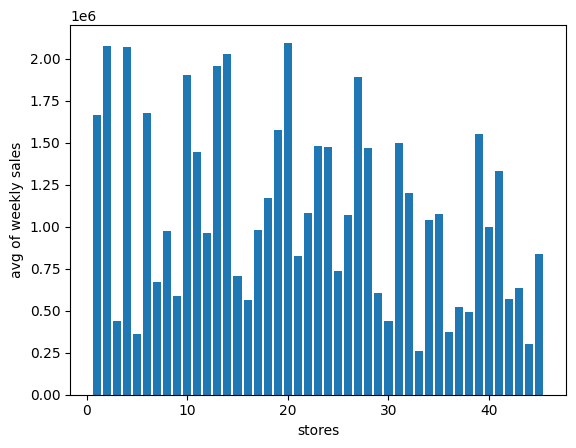

In [52]:
plt.bar(set6['Store'],set6['Weekly_Sales'])
plt.xlabel('stores')
plt.ylabel('avg of weekly sales')
plt.show()

In [53]:
''' From my analysis i found that store 33 is perforance is poor
i think the resasons are because of non holiday, by having high unemployment ,
compared to other stores it has low weekly sales  around 260,000 and the high performing store have 2million weekly sales '''

' From my analysis i found that store 33 is perforance is poor\ni think the resasons are because of non holiday, by having high unemployment ,\ncompared to other stores it has low weekly sales  around 260,000 and the high performing store have 2million weekly sales '

2. Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks

In [86]:
data

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  Month  
0     211.096358         8.106      2  
1     211.242170         8.106      2  
2     211.289143         8.106      2  
3     211.319643         8.106      2  
4     211.350143         8.106      3  
...          ...           ...    ...  
6430  192.013558         8.684      9  
6431  192.170412         8.667     10  
6432  192.327265         8.667     10  
6433  192.330854         8.667     10  
6434  192.308899         8.667     10  

[5920 rows x 9 columns]

In [87]:
store1=data[data['Store']==1]

In [88]:
store1

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0        1 2010-02-05    1643690.90             0        42.31       2.572   
1        1 2010-02-12    1641957.44             1        38.51       2.548   
2        1 2010-02-19    1611968.17             0        39.93       2.514   
3        1 2010-02-26    1409727.59             0        46.63       2.561   
4        1 2010-03-05    1554806.68             0        46.50       2.625   
..     ...        ...           ...           ...          ...         ...   
138      1 2012-09-28    1437059.26             0        76.08       3.666   
139      1 2012-10-05    1670785.97             0        68.55       3.617   
140      1 2012-10-12    1573072.81             0        62.99       3.601   
141      1 2012-10-19    1508068.77             0        67.97       3.594   
142      1 2012-10-26    1493659.74             0        69.16       3.506   

            CPI  Unemployment  Month  
0    211.096358         8.106      2  
1    211.242170         8.106      2  
2    211.289143         8.106      2  
3    211.319643         8.106      2  
4    211.350143         8.106      3  
..          ...           ...    ...  
138  222.981658         6.908      9  
139  223.181477         6.573     10  
140  223.381296         6.573     10  
141  223.425723         6.573     10  
142  223.444251         6.573     10  

[143 rows x 9 columns]

In [89]:
store1.index=store1['Date']

In [90]:
store1

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  \
Date                                                                    
2010-02-05      1 2010-02-05    1643690.90             0        42.31   
2010-02-12      1 2010-02-12    1641957.44             1        38.51   
2010-02-19      1 2010-02-19    1611968.17             0        39.93   
2010-02-26      1 2010-02-26    1409727.59             0        46.63   
2010-03-05      1 2010-03-05    1554806.68             0        46.50   
...           ...        ...           ...           ...          ...   
2012-09-28      1 2012-09-28    1437059.26             0        76.08   
2012-10-05      1 2012-10-05    1670785.97             0        68.55   
2012-10-12      1 2012-10-12    1573072.81             0        62.99   
2012-10-19      1 2012-10-19    1508068.77             0        67.97   
2012-10-26      1 2012-10-26    1493659.74             0        69.16   

            Fuel_Price         CPI  Unemployment  Month  
Date                                                     
2010-02-05       2.572  211.096358         8.106      2  
2010-02-12       2.548  211.242170         8.106      2  
2010-02-19       2.514  211.289143         8.106      2  
2010-02-26       2.561  211.319643         8.106      2  
2010-03-05       2.625  211.350143         8.106      3  
...                ...         ...           ...    ...  
2012-09-28       3.666  222.981658         6.908      9  
2012-10-05       3.617  223.181477         6.573     10  
2012-10-12       3.601  223.381296         6.573     10  
2012-10-19       3.594  223.425723         6.573     10  
2012-10-26       3.506  223.444251         6.573     10  

[143 rows x 9 columns]

In [91]:
store1.drop(columns='Date',inplace=True)

/tmp/ipython-input-91-898384868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store1.drop(columns='Date',inplace=True)


In [92]:
store1

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   
...           ...           ...           ...          ...         ...   
2012-09-28      1    1437059.26             0        76.08       3.666   
2012-10-05      1    1670785.97             0        68.55       3.617   
2012-10-12      1    1573072.81             0        62.99       3.601   
2012-10-19      1    1508068.77             0        67.97       3.594   
2012-10-26      1    1493659.74             0        69.16       3.506   

                   CPI  Unemployment  Month  
Date                                         
2010-02-05  211.096358         8.106      2  
2010-02-12  211.242170         8.106      2  
2010-02-19  211.289143         8.106      2  
2010-02-26  211.319643         8.106      2  
2010-03-05  211.350143         8.106      3  
...                ...           ...    ...  
2012-09-28  222.981658         6.908      9  
2012-10-05  223.181477         6.573     10  
2012-10-12  223.381296         6.573     10  
2012-10-19  223.425723         6.573     10  
2012-10-26  223.444251         6.573     10  

[143 rows x 8 columns]

In [93]:
store1.drop(columns=['Store','CPI','Temperature','Fuel_Price','Holiday_Flag','Unemployment','Month'],inplace=True)
store1

Weekly_Sales
Date                    
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68
...                  ...
2012-09-28    1437059.26
2012-10-05    1670785.97
2012-10-12    1573072.81
2012-10-19    1508068.77
2012-10-26    1493659.74

[143 rows x 1 columns]

In [94]:
from statsmodels.tsa.stattools import adfuller

In [95]:
result=adfuller(store1['Weekly_Sales'])

In [96]:
if result[1]<0.05:
  print('null hypothesis is accepted','data is stationary')
else:
  print('alternate hypothesis is accepted','data is not stationary')

null hypothesis is accepted data is stationary


In [97]:
store1

Weekly_Sales
Date                    
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68
...                  ...
2012-09-28    1437059.26
2012-10-05    1670785.97
2012-10-12    1573072.81
2012-10-19    1508068.77
2012-10-26    1493659.74

[143 rows x 1 columns]

In [98]:
train=store1.iloc[:131]
test=store1.iloc[131:]

In [76]:
!pip install numpy==1.23.5 scipy==1.10.1

In [68]:
!pip install pmdarima

  Using cached pmdarima-2.0.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.3 MB/s eta 0:00:00


In [69]:
from pmdarima import auto_arima

In [70]:
auto=auto_arima(store1['Weekly_Sales'])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [71]:
auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1897.843
Date:                Fri, 20 Jun 2025   AIC                           3807.686
Time:                        15:38:10   BIC                           3825.421
Sample:                    02-05-2010   HQIC                          3814.893
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7500      0.127     -5.919      0.000      -0.998      -0.502
ar.L2         -0.3101      0.128     -2.420      0.016      -0.561      -0.059
ma.L1          0.2867      0.118      2.427      0.015       0.055       0.518
ma.L2         -0.3357      0.109     -3.090      0.002      -0.549      -0.123
ma.L3         -0.6403      0.067     -9.574      0.000      -0.771      -0.509
sigma2      2.408e+10   4.97e-12   4.85e+21      0.000    2.41e+10    2.41e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                44.55
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.77
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.45e+37. Standard errors may be unstable.
"""

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [99]:
model1=SARIMAX(train,order=(2,1,3),seasonal_order=(2,1,3,12))
model1_fit=model1.fit()
store1['predicted']=model1_fit.predict(start=len(train),end=len(train)+len(test)-1)

/tmp/ipython-input-99-1230178522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store1['predicted']=model1_fit.predict(start=len(train),end=len(train)+len(test)-1)


In [100]:
store1

Weekly_Sales     predicted
Date                                  
2010-02-05    1643690.90           NaN
2010-02-12    1641957.44           NaN
2010-02-19    1611968.17           NaN
2010-02-26    1409727.59           NaN
2010-03-05    1554806.68           NaN
...                  ...           ...
2012-09-28    1437059.26  1.622484e+06
2012-10-05    1670785.97  1.513964e+06
2012-10-12    1573072.81  1.541824e+06
2012-10-19    1508068.77  1.557596e+06
2012-10-26    1493659.74  1.737978e+06

[143 rows x 2 columns]

<Axes: xlabel='Date'>

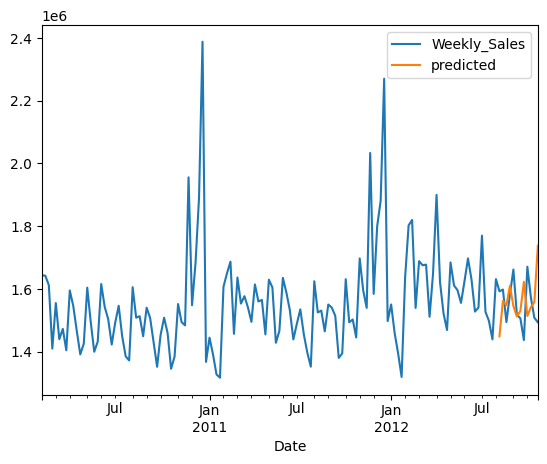

In [101]:
store1[['Weekly_Sales','predicted']].plot()

In [102]:
forecast=model1_fit.get_forecast(steps=16)
future_preds=forecast.predicted_mean

Text(0.5, 1.0, 'FORECAST OF  STORE1')

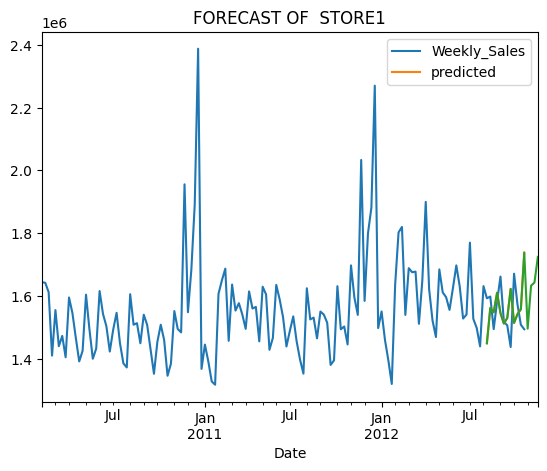

In [103]:
store1.plot()
future_preds.plot()
plt.title('FORECAST OF  STORE1')


<Axes: >

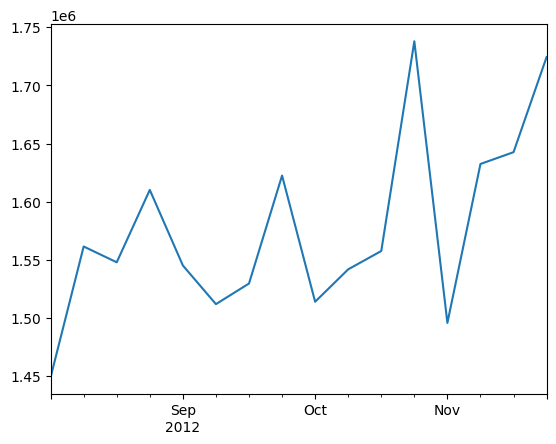

In [104]:
future_preds.plot()


In [105]:
data

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-02-05    1643690.90             0        42.31       2.572   
1         1 2010-02-12    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-03-05    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-10-05     733455.07             0        64.89       3.985   
6432     45 2012-10-12     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  Month  
0     211.096358         8.106      2  
1     211.242170         8.106      2  
2     211.289143         8.106      2  
3     211.319643         8.106      2  
4     211.350143         8.106      3  
...          ...           ...    ...  
6430  192.013558         8.684      9  
6431  192.170412         8.667     10  
6432  192.327265         8.667     10  
6433  192.330854         8.667     10  
6434  192.308899         8.667     10  

[5920 rows x 9 columns]

In [106]:
store5 = data[data['Store'] == 5]

In [107]:
store5

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
572      5 2010-02-05     317173.10             0        39.70       2.572   
573      5 2010-02-12     311825.70             1        39.81       2.548   
574      5 2010-02-19     303447.57             0        41.14       2.514   
575      5 2010-02-26     270281.63             0        46.70       2.561   
576      5 2010-03-05     288855.71             0        48.89       2.625   
..     ...        ...           ...           ...          ...         ...   
710      5 2012-09-28     310141.68             0        78.33       3.666   
711      5 2012-10-05     343048.29             0        71.17       3.617   
712      5 2012-10-12     325345.41             0        66.24       3.601   
713      5 2012-10-19     313358.15             0        69.17       3.594   
714      5 2012-10-26     319550.77             0        71.70       3.506   

            CPI  Unemployment  Month  
572  211.653972         6.566      2  
573  211.800470         6.566      2  
574  211.847128         6.566      2  
575  211.877147         6.566      2  
576  211.907165         6.566      3  
..          ...           ...    ...  
710  223.574102         5.603      9  
711  223.774444         5.422     10  
712  223.974787         5.422     10  
713  224.019287         5.422     10  
714  224.037814         5.422     10  

[143 rows x 9 columns]

In [108]:
store5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 572 to 714
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         143 non-null    int64         
 1   Date          143 non-null    datetime64[ns]
 2   Weekly_Sales  143 non-null    float64       
 3   Holiday_Flag  143 non-null    int64         
 4   Temperature   143 non-null    float64       
 5   Fuel_Price    143 non-null    float64       
 6   CPI           143 non-null    float64       
 7   Unemployment  143 non-null    float64       
 8   Month         143 non-null    int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2)
memory usage: 10.6 KB


In [109]:
store5['Date']=pd.to_datetime(store5['Date'])

/tmp/ipython-input-109-1683451576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store5['Date']=pd.to_datetime(store5['Date'])


In [110]:
store5

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
572      5 2010-02-05     317173.10             0        39.70       2.572   
573      5 2010-02-12     311825.70             1        39.81       2.548   
574      5 2010-02-19     303447.57             0        41.14       2.514   
575      5 2010-02-26     270281.63             0        46.70       2.561   
576      5 2010-03-05     288855.71             0        48.89       2.625   
..     ...        ...           ...           ...          ...         ...   
710      5 2012-09-28     310141.68             0        78.33       3.666   
711      5 2012-10-05     343048.29             0        71.17       3.617   
712      5 2012-10-12     325345.41             0        66.24       3.601   
713      5 2012-10-19     313358.15             0        69.17       3.594   
714      5 2012-10-26     319550.77             0        71.70       3.506   

            CPI  Unemployment  Month  
572  211.653972         6.566      2  
573  211.800470         6.566      2  
574  211.847128         6.566      2  
575  211.877147         6.566      2  
576  211.907165         6.566      3  
..          ...           ...    ...  
710  223.574102         5.603      9  
711  223.774444         5.422     10  
712  223.974787         5.422     10  
713  224.019287         5.422     10  
714  224.037814         5.422     10  

[143 rows x 9 columns]

In [111]:
store5['Date']=pd.to_datetime(store5['Date'])

/tmp/ipython-input-111-1683451576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store5['Date']=pd.to_datetime(store5['Date'])


In [112]:
store5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 572 to 714
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         143 non-null    int64         
 1   Date          143 non-null    datetime64[ns]
 2   Weekly_Sales  143 non-null    float64       
 3   Holiday_Flag  143 non-null    int64         
 4   Temperature   143 non-null    float64       
 5   Fuel_Price    143 non-null    float64       
 6   CPI           143 non-null    float64       
 7   Unemployment  143 non-null    float64       
 8   Month         143 non-null    int32         
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2)
memory usage: 10.6 KB


In [113]:
store5

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
572      5 2010-02-05     317173.10             0        39.70       2.572   
573      5 2010-02-12     311825.70             1        39.81       2.548   
574      5 2010-02-19     303447.57             0        41.14       2.514   
575      5 2010-02-26     270281.63             0        46.70       2.561   
576      5 2010-03-05     288855.71             0        48.89       2.625   
..     ...        ...           ...           ...          ...         ...   
710      5 2012-09-28     310141.68             0        78.33       3.666   
711      5 2012-10-05     343048.29             0        71.17       3.617   
712      5 2012-10-12     325345.41             0        66.24       3.601   
713      5 2012-10-19     313358.15             0        69.17       3.594   
714      5 2012-10-26     319550.77             0        71.70       3.506   

            CPI  Unemployment  Month  
572  211.653972         6.566      2  
573  211.800470         6.566      2  
574  211.847128         6.566      2  
575  211.877147         6.566      2  
576  211.907165         6.566      3  
..          ...           ...    ...  
710  223.574102         5.603      9  
711  223.774444         5.422     10  
712  223.974787         5.422     10  
713  224.019287         5.422     10  
714  224.037814         5.422     10  

[143 rows x 9 columns]

In [114]:
store5.drop(columns=['Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment','Month'],inplace=True)

/tmp/ipython-input-114-4258013457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store5.drop(columns=['Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment','Month'],inplace=True)


In [115]:
store5

Date  Weekly_Sales
572 2010-02-05     317173.10
573 2010-02-12     311825.70
574 2010-02-19     303447.57
575 2010-02-26     270281.63
576 2010-03-05     288855.71
..         ...           ...
710 2012-09-28     310141.68
711 2012-10-05     343048.29
712 2012-10-12     325345.41
713 2012-10-19     313358.15
714 2012-10-26     319550.77

[143 rows x 2 columns]

In [116]:
store5.index=store5['Date']

In [117]:
store5

Date  Weekly_Sales
Date                               
2010-02-05 2010-02-05     317173.10
2010-02-12 2010-02-12     311825.70
2010-02-19 2010-02-19     303447.57
2010-02-26 2010-02-26     270281.63
2010-03-05 2010-03-05     288855.71
...               ...           ...
2012-09-28 2012-09-28     310141.68
2012-10-05 2012-10-05     343048.29
2012-10-12 2012-10-12     325345.41
2012-10-19 2012-10-19     313358.15
2012-10-26 2012-10-26     319550.77

[143 rows x 2 columns]

In [118]:
store5.drop(columns='Date',inplace=True)

/tmp/ipython-input-118-3107209229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store5.drop(columns='Date',inplace=True)


In [119]:
store5

Weekly_Sales
Date                    
2010-02-05     317173.10
2010-02-12     311825.70
2010-02-19     303447.57
2010-02-26     270281.63
2010-03-05     288855.71
...                  ...
2012-09-28     310141.68
2012-10-05     343048.29
2012-10-12     325345.41
2012-10-19     313358.15
2012-10-26     319550.77

[143 rows x 1 columns]

<Axes: xlabel='Date'>

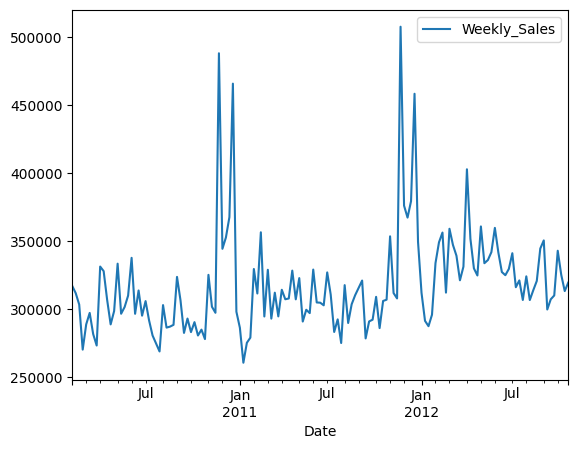

In [120]:
store5.plot()

In [121]:
testing=adfuller(store5['Weekly_Sales'])
testing
if testing[1] < 0.05:
  print('accept null hypothesis and data is stationary')
else:
  print('accept alternate hypothesis and data is not stationary')

accept null hypothesis and data is stationary


In [122]:
train=store5.iloc[:131]
test=store5.iloc[131:]


In [123]:
train

Weekly_Sales
Date                    
2010-02-05     317173.10
2010-02-12     311825.70
2010-02-19     303447.57
2010-02-26     270281.63
2010-03-05     288855.71
...                  ...
2012-07-06     341214.43
2012-07-13     316203.64
2012-07-20     321205.12
2012-07-27     306827.36
2012-08-03     324195.17

[131 rows x 1 columns]

In [124]:
test

Weekly_Sales
Date                    
2012-08-10     306759.70
2012-08-17     314014.18
2012-08-24     320831.36
2012-08-31     344642.01
2012-09-07     350648.91
2012-09-14     299800.67
2012-09-21     307306.76
2012-09-28     310141.68
2012-10-05     343048.29
2012-10-12     325345.41
2012-10-19     313358.15
2012-10-26     319550.77

In [125]:
auto=auto_arima(store5['Weekly_Sales'])
auto.summary()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  143
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1694.925
Date:                Fri, 20 Jun 2025   AIC                           3395.851
Time:                        17:06:15   BIC                           3404.718
Sample:                    02-05-2010   HQIC                          3399.454
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3757      0.072      5.195      0.000       0.234       0.518
ma.L1         -0.8889      0.039    -22.821      0.000      -0.965      -0.813
sigma2       1.24e+09   1.14e-11   1.08e+20      0.000    1.24e+09    1.24e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.77   Jarque-Bera (JB):               703.35
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             2.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.03e+36. Standard errors may be unstable.
"""

In [126]:
model2=SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,12))
model2_fit=model2.fit()
store5['Predicted']=model2_fit.predict(start=len(train),end=len(train)+len(test)-1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/tmp/ipython-input-126-2190172933.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store5['Predicted']=model2_fit.predict(start=len(train),end=len(train)+len(test)-1)


In [127]:
store5

Weekly_Sales      Predicted
Date                                   
2010-02-05     317173.10            NaN
2010-02-12     311825.70            NaN
2010-02-19     303447.57            NaN
2010-02-26     270281.63            NaN
2010-03-05     288855.71            NaN
...                  ...            ...
2012-09-28     310141.68  325619.985421
2012-10-05     343048.29  307573.311961
2012-10-12     325345.41  312264.985182
2012-10-19     313358.15  314131.466892
2012-10-26     319550.77  336232.312153

[143 rows x 2 columns]

<Axes: xlabel='Date'>

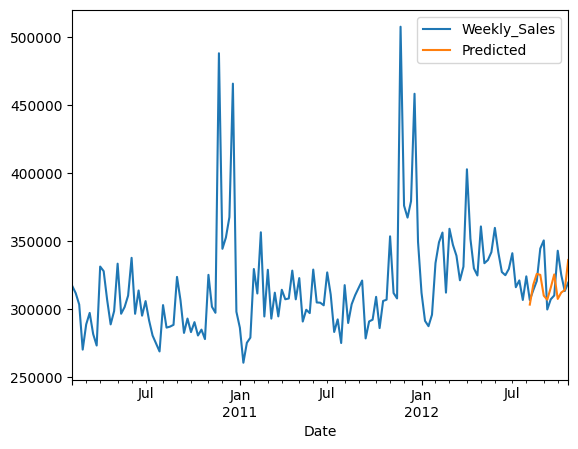

In [128]:
store5[['Weekly_Sales','Predicted']].plot()

In [143]:
forecast=model2_fit.get_forecast(steps=16)
future_preds=forecast.predicted_mean

Text(0.5, 1.0, 'Forecast Graph of Store5')

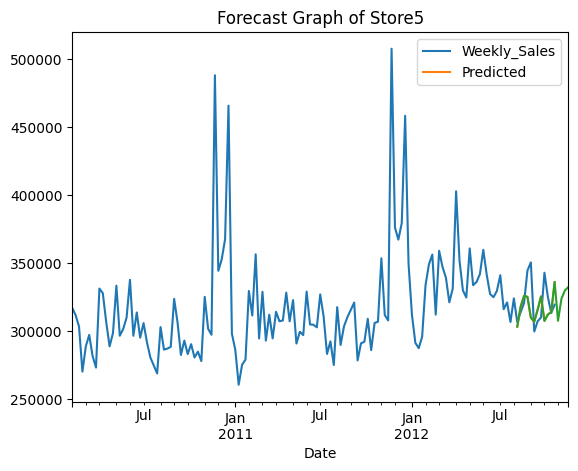

In [146]:
store5[['Weekly_Sales','Predicted']].plot()
future_preds.plot()
plt.title('Forecast Graph of Store5')

<Axes: >

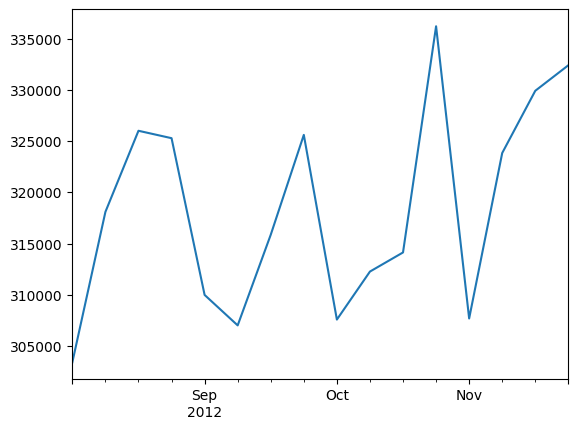

In [145]:
future_preds.plot()